<a href="https://colab.research.google.com/github/ustyuzhaninky/OSAR-keras/blob/master/colab/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OSAR visulization

**Author:** [Konstantin Ustyuzhanin](https://www.facebook.com/konstantin.ustuzhanin/)<br>
**Date created:** 2020/09/16<br>
**Last modified:** 2020/12/8<br>
**Description:** Implement Objective Stimuli Active Repeater (OSAR) internal function visualization.

In [1]:
!pip install ../../OSAR-keras/.

Processing d:\jorgen\projects\python\phdsub\towerproject\osar-keras
  Created wheel for OSAR: filename=OSAR-0.1.3-py3-none-any.whl size=62942 sha256=536b2d9f62bdaba489cd31cfdfa02fee6a5ed2c97d40cea160184b1b6244621d
  Stored in directory: c:\users\jorgen\appdata\local\pip\cache\wheels\c1\47\9b\5ea3916f9076eb35b20fd4c74a83a23ec1402cdf3663dfcd90
Successfully built OSAR
  Attempting uninstall: OSAR
    Found existing installation: OSAR 0.1.3
    Uninstalling OSAR-0.1.3:
      Successfully uninstalled OSAR-0.1.3


In [2]:
import os
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
os.environ['TF_KERAS'] = '1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))
# Configuration parameters for the whole setup
seed = 42

TensorFlow version: 2.3.0
Eager execution: True


batch_size=1250
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
helix_memory (HelixMemory)   (1, 24, 5)                120       
Total params: 120
Trainable params: 0
Non-trainable params: 120
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
helix_memory_1 (HelixMemory) (1, 24, 5)                120       
Total params: 120
Trainable params: 0
Non-trainable params: 120
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
helix_memory_2 (HelixMemory) (1, 24, 5)                170       
Total params: 170
Trainable params: 50
Non-trainable params: 120
_

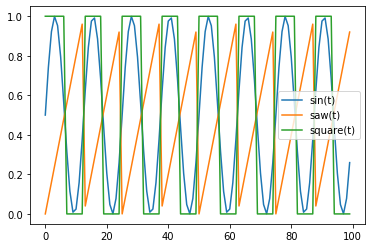

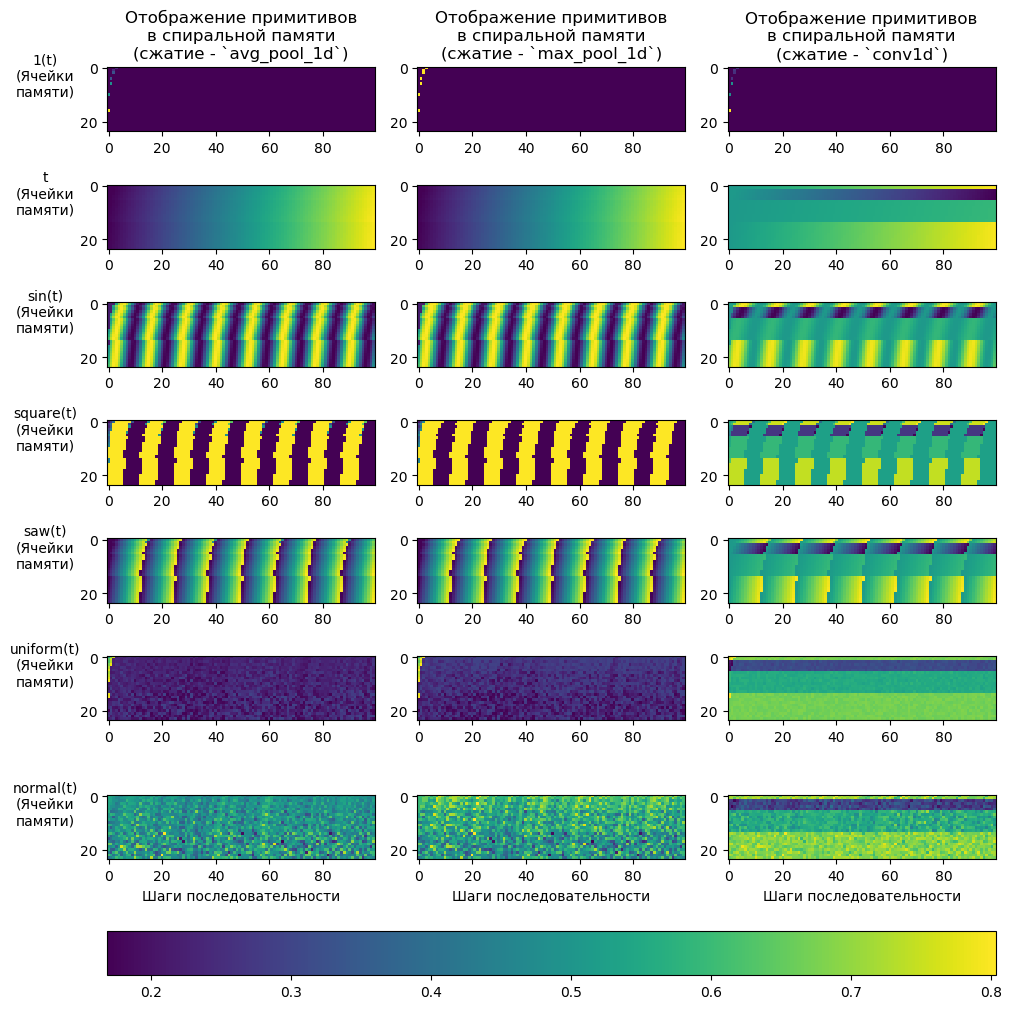

In [3]:
from OSAR import HelixMemory
from scipy import signal
import matplotlib.pyplot as plt

n_samples = 8
n_features = 5
test_samples = 100
memory_len = 10
n_turns = 3
sampling_rate = 10000
frequency = 100
batch_size = int(np.floor(sampling_rate / n_samples))
print(f'batch_size={batch_size}')

total_memory = memory_len + sum(pow(2, i) for i in range(1, n_turns+1))

# Models
model_avg = tf.keras.models.Sequential([
    HelixMemory(1, memory_len, n_turns, 2, mode='avg', input_shape=(n_samples, n_features))
])
model_avg.summary()
model_avg.compile(optimizer='adam', loss='mse')

model_max = tf.keras.models.Sequential([
    HelixMemory(1, memory_len, n_turns, 2, mode='max', input_shape=(n_samples, n_features))
])
model_max.summary()
model_max.compile(optimizer='adam', loss='mse')

model_conv = tf.keras.models.Sequential([
    HelixMemory(1, memory_len, n_turns, 2, mode='conv', input_shape=(n_samples, n_features))
])
model_conv.summary()
model_conv.compile(optimizer='adam', loss='mse')

# Data

ts = np.reshape(np.linspace(0, 1, n_features*sampling_rate, endpoint=True),
                (batch_size, n_samples, n_features))[:test_samples]
blip = np.zeros_like(ts)
blip[0][0][0] = 1
# blip = tf.constant(blip, dtype=tf.float32)
line = ts
sine = np.sin(2 * np.pi * frequency * ts) / 2 + 0.5
square = signal.square(2 * np.pi * frequency * ts) / 2 + 0.5
saw = signal.sawtooth(2 * np.pi * frequency * ts) / 2 + 0.5
uniform = np.random.uniform(size=(test_samples, n_samples, n_features)) / 10 + 0.5
normal = np.random.normal(size=(test_samples, n_samples, n_features)) / 10 + 0.5

# model.fit(x=uniform, y=uniform, epochs=100)

# plt.plot(line[:, 0, 0])
plt.plot(sine[:, 0, 0], label='sin(t)')
plt.plot(saw[:, 0, 0], label='saw(t)')
plt.plot(square[:, 0, 0], label='square(t)')
# plt.plot(blip[:, 0, 0], label='1(t)')
# plt.plot(uniform[:, 0, 0], label='uniform(t)')
# plt.plot(normal[:, 0, 0], label='normal(t)')
plt.legend()
plt.show()

# Filter train
def process(model, x):
    prd = model.predict(x, batch_size=1)
    return prd

blip_mem = [process(model_avg, blip), process(model_max, blip), process(model_conv, blip)]
line_mem = [process(model_avg, line), process(model_max, line), process(model_conv, line)]
sine_mem = [process(model_avg, sine), process(model_max, sine), process(model_conv, sine)]
square_mem = [process(model_avg, square), process(model_max, square), process(model_conv, square)]
saw_mem = [process(model_avg, saw), process(model_max, saw), process(model_conv, saw)]
uniform_mem = [process(model_avg, uniform), process(model_max, uniform), process(model_conv, uniform)]
normal_mem = [process(model_avg, normal), process(model_max, normal), process(model_conv, normal)]

# Plot
fig_gif1, axs_gif1 = plt.subplots(nrows=7, ncols=3, dpi=100, figsize=(10,10), constrained_layout=True)
axs_gif1[0, 0].set_title('Отображение примитивов\nв спиральной памяти\n(сжатие - `avg_pool_1d`)')
axs_gif1[0, 0].imshow(np.transpose(blip_mem[0][:, :, 0]))
axs_gif1[0, 0].set_ylabel('1(t)\n(Ячейки\nпамяти)', rotation='horizontal', labelpad=25)
axs_gif1[0, 1].set_title('Отображение примитивов\nв спиральной памяти\n(сжатие - `max_pool_1d`)')
axs_gif1[0, 1].imshow(np.transpose(blip_mem[1][:, :, 0]))
axs_gif1[0, 2].set_title('Отображение примитивов\nв спиральной памяти\n(сжатие - `conv1d`)')
axs_gif1[0, 2].imshow(np.transpose(blip_mem[2][:, :, 0]))

axs_gif1[1, 0].imshow(np.transpose(line_mem[0][:, :, 0]))
axs_gif1[1, 0].set_ylabel('t\n(Ячейки\nпамяти)', rotation='horizontal', labelpad=25)
axs_gif1[1, 1].imshow(np.transpose(line_mem[1][:, :, 0]))
axs_gif1[1, 2].imshow(np.transpose(line_mem[2][:, :, 0]))

axs_gif1[2, 0].imshow(np.transpose(sine_mem[0][:, :, 0]))
axs_gif1[2, 0].set_ylabel('sin(t)\n(Ячейки\nпамяти)', rotation='horizontal', labelpad=25)
axs_gif1[2, 1].imshow(np.transpose(sine_mem[1][:, :, 0]))
axs_gif1[2, 2].imshow(np.transpose(sine_mem[2][:, :, 0]))

axs_gif1[3, 0].imshow(np.transpose(square_mem[0][:, :, 0]))
axs_gif1[3, 0].set_ylabel('square(t)\n(Ячейки\nпамяти)', rotation='horizontal', labelpad=25)
axs_gif1[3, 1].imshow(np.transpose(square_mem[1][:, :, 0]))
axs_gif1[3, 2].imshow(np.transpose(square_mem[2][:, :, 0]))

axs_gif1[4, 0].imshow(np.transpose(saw_mem[0][:, :, 0]))
axs_gif1[4, 0].set_ylabel('saw(t)\n(Ячейки\nпамяти)', rotation='horizontal', labelpad=25)
axs_gif1[4, 1].imshow(np.transpose(saw_mem[1][:, :, 0]))
axs_gif1[4, 2].imshow(np.transpose(saw_mem[2][:, :, 0]))

axs_gif1[5, 0].imshow(np.transpose(uniform_mem[0][:, :, 0]))
axs_gif1[5, 0].set_ylabel('uniform(t)\n(Ячейки\nпамяти)', rotation='horizontal', labelpad=25)
axs_gif1[5, 1].imshow(np.transpose(uniform_mem[1][:, :, 0]))
axs_gif1[5, 2].imshow(np.transpose(uniform_mem[2][:, :, 0]))

im = axs_gif1[6, 0].imshow(np.transpose(normal_mem[0][:, :, 0]))
axs_gif1[6, 0].set_ylabel('normal(t)\n(Ячейки\nпамяти)', rotation='horizontal', labelpad=25)
axs_gif1[6, 0].set_xlabel('Шаги последовательности')
axs_gif1[6, 1].imshow(np.transpose(normal_mem[1][:, :, 0]))
axs_gif1[6, 1].set_xlabel('Шаги последовательности')
axs_gif1[6, 2].imshow(np.transpose(normal_mem[2][:, :, 0]))
axs_gif1[6, 2].set_xlabel('Шаги последовательности')

fig_gif1.colorbar(im, ax=[axs_gif1[6, 0],
                          axs_gif1[6, 1],
                          axs_gif1[6, 2]], location='bottom', )
# fig_gif1.tight_layout()
plt.show()

In [4]:
from OSAR import HelixMemory, AttentionGate
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

n_samples = 8
n_features = 1
test_samples = 100
memory_len = 32
n_turns = 3
sampling_rate = 10000
frequency = 100
total_memory = memory_len + sum(pow(2, i) for i in range(1, n_turns+1))

BATCH_SIZE = 64

# Models

class DemoModel(tf.keras.Model):
    def __init__(self, n_samples, n_features, batch_size, memory_len, n_turns):
        super(DemoModel, self).__init__()
#         self.state = tf.keras.layers.Input(shape=(n_samples, n_features), batch_size=batch_size)
        self.memory = HelixMemory(BATCH_SIZE, memory_len, n_turns, 2,
                                  regularizer='l2',
                                  mode='conv',
                                  )
        self.attention = AttentionGate(
                         units=n_samples,
                         dropout=0.2,
                         attention_dropout=0.2,
                         kernel_regularizer='l2',
                         bias_regularizer='l2',
                         )
        self.head = tf.keras.layers.Dense(n_samples)
    
    def call(self, state):
        x = self.memory(state)
        x = self.attention(x)
        out = self.head(x)
        return out
        
model = DemoModel(
     n_samples,
     n_features,
     BATCH_SIZE,
     memory_len,
     n_turns
     )
# model.summary()
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# training and evaluation
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.MeanSquaredError()

def loss_function(real, pred):
    return tf.reduce_mean(loss_object(real, pred))

def train_step(inp, targ):
    loss = 0

    with tf.GradientTape() as tape:
        predictions = model(inp)

        loss = loss_function(targ, predictions)

        batch_loss = (loss / int(targ.shape[1]))
#         batch_loss = model.train_on_batch(inp, targ)

        variables = model.trainable_variables

        gradients = tape.gradient(loss, variables)

        optimizer.apply_gradients(zip(gradients, variables))

    return batch_loss

# Data

ts = tf.reshape(np.linspace(0, 1, n_features*n_samples*sampling_rate, endpoint=True),
                (sampling_rate, n_samples, n_features))
sine = np.sin(2 * np.pi * frequency * ts) / 2 + 0.5
square = signal.square(2 * np.pi * frequency * ts) / 2 + 0.5
saw = signal.sawtooth(2 * np.pi * frequency * ts) / 2 + 0.5
uniform = np.random.uniform(size=(sampling_rate, n_samples, n_features)) / 10 + 0.5
normal = np.random.normal(size=(sampling_rate, n_samples, n_features)) / 10 + 0.5

data_1 = 0.5*sine + 0.5*normal

print(data_1.shape)

input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(
    data_1, sine, test_size=0.2, shuffle=False)

EPOCHS = 30
BUFFER_SIZE = len(input_tensor_train)
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

for epoch in range(EPOCHS):
    start = time.time()
    total_loss = 0
    
    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ)
        total_loss += batch_loss

    if batch % 100 == 0:
        print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                     batch,
                                                     batch_loss.numpy()))
    # saving (checkpoint) the model every 2 epochs
#     if (epoch + 1) % 2 == 0:
#         checkpoint.save(file_prefix = checkpoint_prefix)

    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                        total_loss / steps_per_epoch))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

(10000, 8, 1)

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



InvalidArgumentError: Incompatible shapes: [64,2,8] vs. [64,8,1] [Op:SquaredDifference]

In [ ]:
def evaluate(example):
    attention_plot = np.zeros((n_samples, n_samples))
    predictions = model(example)

    # storing the attention weights to plot later on
#     attention_plot = attention_weights.numpy()

    return predictions

# function for plotting the attention weights
def plot_attention(attention):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    plt.show()

data_2 = 0.5*square + 0.5*normal
data_3 = 0.5*saw + 0.5*normal

dataset_test_1 = tf.data.Dataset.from_tensor_slices((input_tensor_val, target_tensor_val))
dataset_test_1 = dataset_test_1.batch(BATCH_SIZE, drop_remainder=True)

input_tensor_train2, input_tensor_val2, target_tensor_train2, target_tensor_val2 = train_test_split(
    data_2, square, test_size=0.2, shuffle=False)
dataset_test_2 = tf.data.Dataset.from_tensor_slices((input_tensor_val2, target_tensor_val2))
dataset_test_2 = dataset_test_2.batch(BATCH_SIZE, drop_remainder=True)

input_tensor_train3, input_tensor_val3, target_tensor_train3, target_tensor_val3 = train_test_split(
    data_3, square, test_size=0.2, shuffle=False)
dataset_test_3 = tf.data.Dataset.from_tensor_slices((input_tensor_val3, target_tensor_val3))
dataset_test_3 = dataset_test_3.batch(BATCH_SIZE, drop_remainder=True)
data_1_restore_test = evaluate(input_tensor_val[-BATCH_SIZE:])
data_2_restore_test = evaluate(input_tensor_val2[-BATCH_SIZE:])
data_3_restore_test = evaluate(input_tensor_val3[-BATCH_SIZE:])

print(input_tensor_val.shape, data_1_restore_test.shape)

fig_gif1, axs_gif1 = plt.subplots(nrows=3, ncols=1, dpi=100, figsize=(10, 10), constrained_layout=True)
axs_gif1[0].set_title('Восстановление периодических сигналов сетью'
                      ' с графовым слоем внимания и спиральной памятью\n(сжатие - `conv1d`)')
axs_gif1[0].plot(input_tensor_val[..., 0], label='sin(t)+noise')
axs_gif1[0].plot(data_1_restore_test, label='Attention')
axs_gif1[0].set_ylabel('s(t))', rotation='horizontal', labelpad=25)
axs_gif1[0].set_xlabel('Время (t), c')
axs_gif1[0].legend()
axs_gif1[0].grid()
axs_gif1[1].plot(input_tensor_val2[..., 0], label='square(t)+noise')
axs_gif1[1].plot(data_2_restore_test, label='Attention')
axs_gif1[1].set_ylabel('s(t))', rotation='horizontal', labelpad=25)
axs_gif1[1].set_xlabel('Время (t), c')
axs_gif1[1].legend()
axs_gif1[1].grid()
axs_gif1[2].plot(input_tensor_val3[..., 0], label='saw(t)+noise')
axs_gif1[2].plot(data_3_restore_test, label='Attention')
axs_gif1[2].set_ylabel('s(t))', rotation='horizontal', labelpad=25)
axs_gif1[2].set_xlabel('Время (t), c')
axs_gif1[2].legend()
axs_gif1[2].grid()
plt.show()

# plot_attention(attention_plot_1[-1])
# plot_attention(attention_plot_2[-1])
# plot_attention(attention_plot_3[-1])